In [16]:
import sys
import os
sys.path.append(os.path.abspath("../Codes"))

from Interpolation.lagrange_poly import lagrange_pol
from Interpolation.newton_divided_difference import dividif_pol
from Interpolation.spline_curve_fitting import spline_pol
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import sympy as sp

# Sample Data
x_vals = np.array([0.1, 0.2, 0.3, 0.4], dtype=float)
y_vals = np.array([-0.62049958,-0.28398668,0.00660095,0.24842440], dtype=float)
test_point = 0.05

# Run interpolations
div_val, div_poly = dividif_pol(x_vals, y_vals, test_point)
lag_val, lag_poly, scipy_lag_val = lagrange_pol(x_vals, y_vals, test_point)
sp_res,a, b, c, d= spline_pol(x_vals, y_vals,test_point)

spline = CubicSpline(x_vals, y_vals)
res_spline=spline(test_point)

# Print evaluations
print(f"Interpolated value at x = {test_point}")
print(f"→ Newton Divided Difference: {div_val}")
print(f"→ Lagrange (Manual): {lag_val}")
print(f"→ Symbolic Polynomial (Lagrange): {lag_poly}")
print(f"→ Lagrange (SciPy): {scipy_lag_val}")
print(f"→ Cubic Spline (Manual): {sp_res}")
print(f"→ Cubic Spline (SciPy): {res_spline}")


Interpolated value at x = 0.05
→ Newton Divided Difference: -0.80597800625
→ Lagrange (Manual): -0.8050908468749963
→ Symbolic Polynomial (Lagrange): -0.473151666666717*u**3 - 2.01237249999997*u**2 + 4.00196136666666*u - 1.00009884
→ Lagrange (SciPy): [-0.62049958 -0.28398668  0.00660095  0.2484244 ]
→ Cubic Spline (Manual): []
→ Cubic Spline (SciPy): -0.8050908468750002


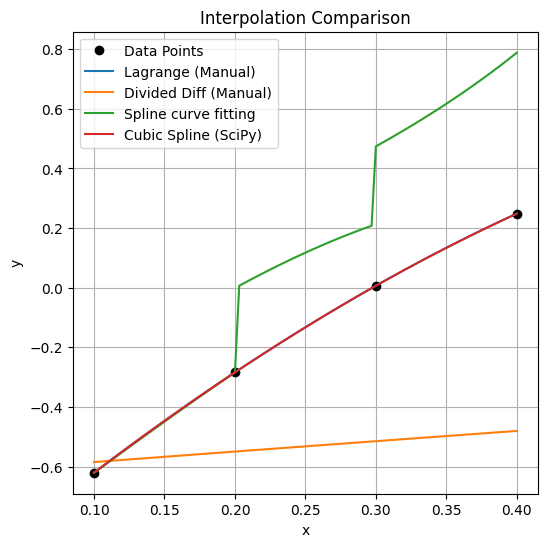

In [17]:
#visualization
# Evaluate over domain
dense_x = np.linspace(x_vals[0], x_vals[-1], 100)
lag_manual_func = sp.lambdify(sp.Symbol('u'), lag_poly)
div_manual_func = sp.lambdify(sp.Symbol('u'), div_poly)
#evaluate in spline curve fitting
result = []
for k in dense_x:
    for i in range(len(x_vals)-1):
        if x_vals[i] <= k <= x_vals[i+1]:
            dx = k - dense_x[i]
            y = a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3
            result.append(y)
            break

plt.figure(figsize=(6,6))
plt.plot(x_vals, y_vals, 'ko', label="Data Points")
plt.plot(dense_x, lag_manual_func(dense_x), label="Lagrange (Manual)")
plt.plot(dense_x, div_manual_func(dense_x), label="Divided Diff (Manual)")
plt.plot(dense_x, result, label="Spline curve fitting")
plt.plot(dense_x, spline(dense_x), label="Cubic Spline (SciPy)")
plt.title("Interpolation Comparison")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


While lagrange,newton's divided difference shows consistent results with the exact results(scipy), spline curve fit shows inconsistency.
